In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Real.csv")

In [3]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
housing['X5 latitude'].value_counts()

X5 latitude
24.97433    14
24.98203    13
24.96674     9
24.96515     9
24.96299     8
            ..
24.98034     1
24.97493     1
24.94898     1
24.98489     1
24.97923     1
Name: count, Length: 234, dtype: int64

In [6]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

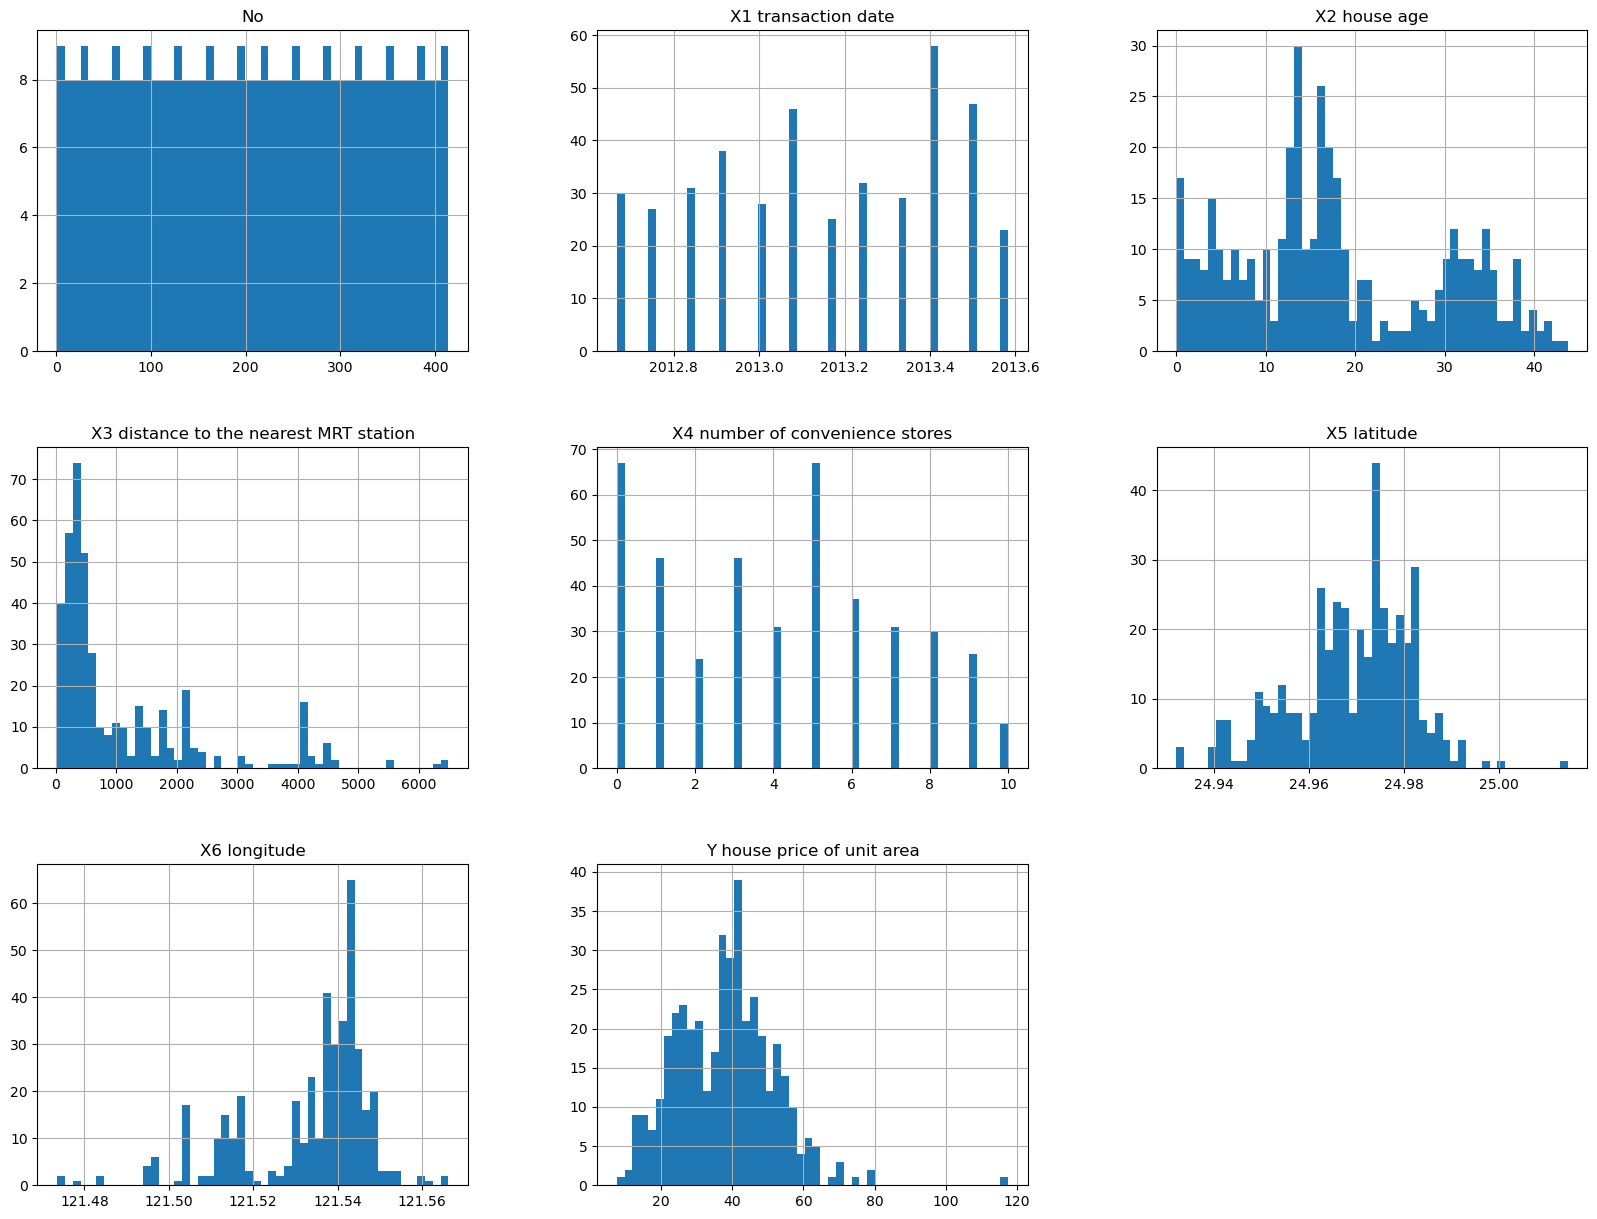

In [9]:
housing.hist(bins= 50, figsize=(20, 15))

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Use the 'X4 number of convenience stores' column to create the training and testing sets
train_index = housing['X4 number of convenience stores']
test_index = housing['X4 number of convenience stores']

train_set = housing.loc[train_index.index]
test_set = housing.loc[test_index.index]

In [11]:
test_set['X4 number of convenience stores'].value_counts()

X4 number of convenience stores
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: count, dtype: int64

In [12]:
corr_matrix = housing.corr()

In [13]:
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

array([[<Axes: xlabel='X1 transaction date', ylabel='X1 transaction date'>,
        <Axes: xlabel='X2 house age', ylabel='X1 transaction date'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X1 transaction date'>],
       [<Axes: xlabel='X1 transaction date', ylabel='X2 house age'>,
        <Axes: xlabel='X2 house age', ylabel='X2 house age'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X2 house age'>],
       [<Axes: xlabel='X1 transaction date', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X2 house age', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>]],
      dtype=object)

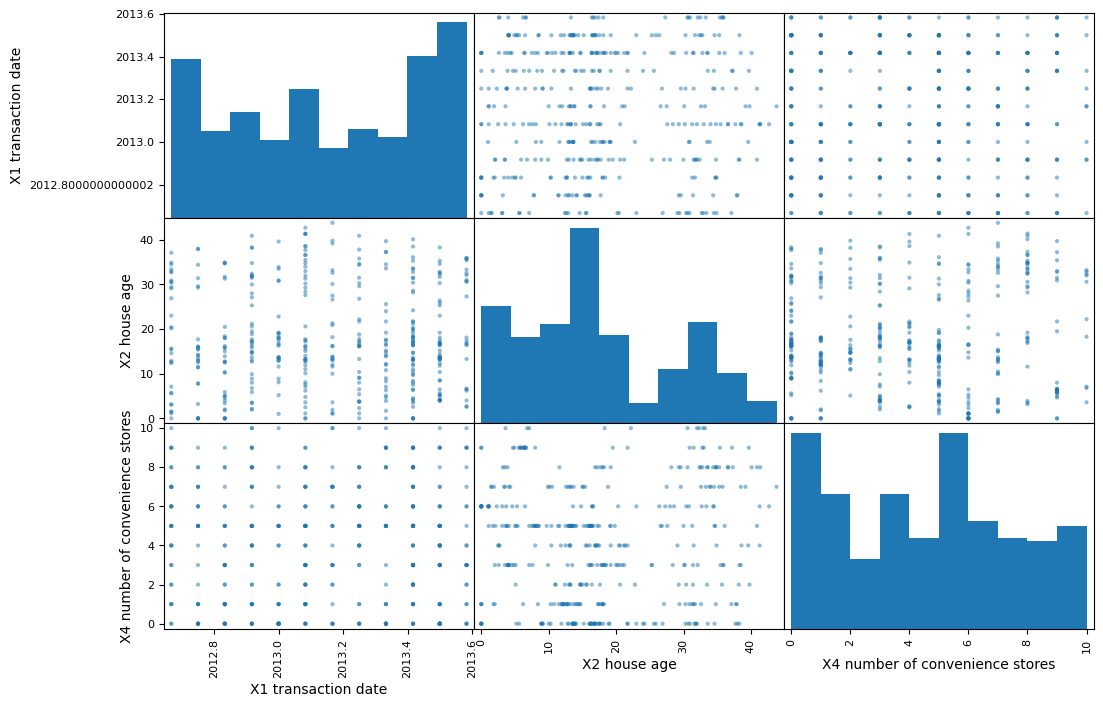

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["X1 transaction date", "X2 house age", "X4 number of convenience stores"]
scatter_matrix(housing[attributes], figsize=(12,8))

In [15]:
housing = train_set.drop("Y house price of unit area", axis=1)
housing_labels = train_set["Y house price of unit area"].copy()

In [16]:
median = housing["X4 number of convenience stores"].median()

In [17]:
housing["X4 number of convenience stores"].fillna(median)

0      10
1       9
2       5
3       5
4       5
       ..
409     0
410     9
411     7
412     5
413     9
Name: X4 number of convenience stores, Length: 414, dtype: int64

In [18]:
housing.shape


(414, 7)

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_

array([ 207.5    , 2013.167  ,   16.1    ,  492.2313 ,    4.     ,
         24.9711 ,  121.53863])

In [21]:
X =  imputer.transform(housing)

In [22]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [23]:
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [31]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [33]:
housing_num_tr.shape

(414, 7)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [28]:
some_data = housing.iloc[:5]

In [29]:
some_labels = housing_labels.iloc[:5]

In [35]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([47.89494828, 48.56266359, 49.48549608, 49.06033833, 46.89537276])

In [41]:
list(some_labels)

[37.9, 42.2, 47.3, 54.8, 43.1]

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)



In [49]:
lin_mse

76.94835499495503